<a href="https://colab.research.google.com/github/OnzyBoy/Pandas_CDAV/blob/main/1_CDAV_Pandas_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Pandas

In [ ]:
import pandas as pd #Importing pandas
import random #Importing random

Using Pandas

In [ ]:
scores = [78, 80, 86, 68, 66, 80]
mean = sum(scores) / len(scores)
print(f"Mean: {mean}")


def calc_median(scores):
  sorted_scores = sorted(scores)
  n = len(sorted_scores)
  mid = n // 2

  if n%2 ==0:
    return (sorted_scores[mid-1] + sorted_scores[mid]) / 2
  else:
    return sorted_scores[mid]

median = calc_median(scores)
print(f"Median: {median}")

#Converting list to a pandas series
scores_series = pd.Series(scores)
print(f"Mean: {scores_series.mean()}")
print(f"Median: {scores_series.median()}")


Mean: 76.33333333333333
Median: 79.0
Mean: 76.33333333333333
Median: 79.0


In [ ]:
#Creating a DataFrame df
name = ['Tom', 'Alice', 'Jane', 'Bob', 'Samantha', 'June']
test_results = pd.DataFrame({
    'name': name,
    'score': scores
})
test_results

#Adding new column(s) to a DF
age = [19,20,18,21,17,19]
test_results['age'] = age
test_results

gender = ['M', 'F', 'F', 'M', 'F', 'F']
test_results['gender'] = gender
test_results['gender'] = test_results['gender'].str.lower()

#To know M / F Gender percentages
test_results['gender'].value_counts(normalize=True)*100

#Grade - 80+ = pass else fail
def pass_fail(score):
  if score>= 80:
    return 'pass'
  else:
    return 'fail'

test_results['pass/fail'] = test_results['score'].apply(pass_fail)
test_results

,name,score,age,gender,pass/fail
0,Tom,78,19,m,fail
1,Alice,80,20,f,pass
2,Jane,86,18,f,pass
3,Bob,68,21,m,fail
4,Samantha,66,17,f,fail
5,June,80,19,f,pass


In [ ]:
#Dropping a column
# test_results=test_results.drop(columns=['age'])
test_results

#Adding DOB
dob = ['02/03/2003', '08/05/2001', '07/06/2000', '15/12/2001', '17/01/2000', '01/01/2002']
test_results['dob'] = dob #Object type

#See data type
# test_results.info()

#Change DOB to date/time. And specifying the format
test_results['dob'] = pd.to_datetime(test_results['dob'], format='%d/%m/%Y')
# test_results


#Calculate the age of each person with Dob
test_results['age'] = (pd.Timestamp.now() - test_results['dob']).dt.days / 365.25 #Converting days to years
test_results['age'] = test_results['age'].astype(int) #converting to a whole number int
#Accessing date properties
test_results

,name,score,age,gender,pass/fail,dob
0,Tom,78,22,m,fail,2003-03-02
1,Alice,80,24,f,pass,2001-05-08
2,Jane,86,25,f,pass,2000-06-07
3,Bob,68,23,m,fail,2001-12-15
4,Samantha,66,25,f,fail,2000-01-17
5,June,80,23,f,pass,2002-01-01


#Task
- Create a DF w/ the following columns: Name, Gender, English, Swahili, Math, Science, SST
- name the df class_scores
- Calculate the total score of subjects in a new colum total
- Create a column showing grades: A:400, B:350+ C:200+, D:250+ E:200+, F:'<200'
- Calculate the proportion of Grades in class

*Bonus - Find the average score of Male and Female students





In [ ]:
names = ["Alice Mwangi", "Allan Kamau", "Brenda Kipyegon", "Bart Simpson", "Clementine Gesare","Carl Wambui",
         "Dee Mbala", "Davis Mabaru", "Evelyn Mutiso", "Earl Karanja"
         ]
gender = ["F","M","F","M","F","M","F","M","F","M"]
eng_score = [50,60,33,21,65,76,89,55,90,54]
kis_score = [21, 54, 69, 75, 25, 65, 78, 15, 52, 65]
math_score = [14,64,28,34,65,85,32,95,67,54]
sci_score = [54, 65, 74, 23, 35, 45, 56, 87, 90, 45]
sst_score = [23, 84, 98, 41, 35, 54, 65, 71, 52, 84]

class_scores = pd.DataFrame({
    'name': names,'gender': gender,
    'english': eng_score,'kiswahili': kis_score,
    'math': math_score,"science": sci_score,
    'sst': sst_score})

#Total scores per student
class_scores['total'] = class_scores['english']  + class_scores['kiswahili'] + class_scores['math'] + class_scores['science'] + class_scores['sst']

#Grade per student
def grade(total):
  if total >=320:
    return "A"
  elif total >=280:
    return "B"
  elif total >=200:
    return "C"
  elif total >=175:
    return "D"
  elif total >=150:
    return "E"
  else:
    return "F"
class_scores['grade'] = class_scores['total'].apply(grade)

#Calculate the proportion of Grades in class
grade_proportion = class_scores['grade'].value_counts(normalize=True)*100
#print(grade_proportion)

#Average Male and Female Score
male_female_avg = class_scores.groupby('gender')['total'].mean()
class_scores.groupby('gender').agg({
    'total': ['mean', 'std', 'min','max']
    })
#print(male_female_avg)

#Selecting multiple columns at once
class_scores[['name','total','grade']]

#Pandas Slicing r,c
#axis 0 - column; axis 1 - row

#Total for each subject (Per person)
class_scores.iloc[:,2:7].sum(axis=1)

#Mean for each subject
class_scores.iloc[:,2:7].mean(axis=0)

#Sorting values in a DF
class_scores = class_scores.sort_values(by='total', ascending=False)

#Return the name of student with highest score in Kis
class_scores.sort_values(by='kiswahili', ascending=False).iloc[0,:]

class_scores.groupby('gender').agg({
    'total': ['mean', 'std', 'min','max'],
    'kiswahili': 'max'
    })


total                      kiswahili
         mean        std  min  max       max
gender                                      
F       272.0  77.061664  162  351        78
M       294.2  56.909577  194  327        75

<Axes: ylabel='gender'>

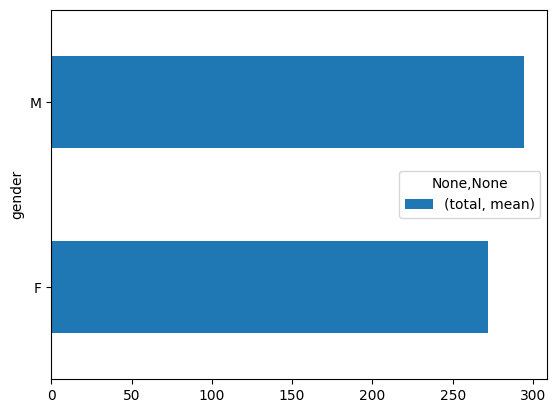

In [ ]:
class_scores.groupby('gender').agg({
    'total': ['mean'],
    }).plot(
        kind="barh"
    )

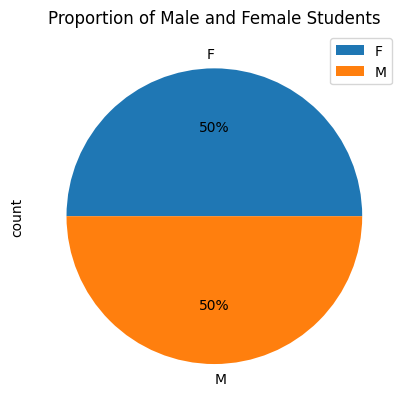

In [ ]:
#Pie chart showing M/F distribution
class_scores['gender'].value_counts()\
.plot(
        kind='pie',
        title = "Proportion of Male and Female Students",
        autopct = '%1.0f%%',
        legend = True,
      );

In [ ]:
#Summary of Statistics
class_scores.describe()

,english,kiswahili,math,science,sst,total
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.00000
mean,59.300000,51.900000,53.800000,57.40000,60.700000,283.10000
std,22.181323,23.321187,26.228907,21.80316,24.018743,64.92808
min,21.000000,15.000000,14.000000,23.00000,23.000000,162.00000
25%,51.000000,31.750000,32.500000,45.00000,43.750000,244.25000
50%,57.500000,59.500000,59.000000,55.00000,59.500000,311.00000
75%,73.250000,68.000000,66.500000,71.75000,80.750000,324.50000
max,90.000000,78.000000,95.000000,90.00000,98.000000,351.00000


## Code Recap

Guessing Game

In [ ]:
import random

def guess_number():
    attempts = 3
    wrong_attempts = 4
    num_to_guess = random.randint(1, 10)  # number between 1 and 10
    print(f"Number to guess: {num_to_guess}")
    print("Guess the number between 1 and 10!")

    while attempts > 0:
        try:
          num = int(input("Enter your guess: "))

          #Invalid input to be 5 attempts
          if num < 1 or num > 10:
              print("Please enter a number between 1 and 10.")
              if wrong_attempts > 0:
                print(f"Invalid input. Please enter a valid number. You have {wrong_attempts} attempts remaining")
                wrong_attempts-=1
              elif wrong_attempts == 0:
                print("Can't enter again")
                break
              continue
          if num == num_to_guess:
              print("You guessed correctly!")
              break
          else:
              attempts -= 1
              if attempts > 0:
                  print(f"Wrong guess. You have {attempts} attempts remaining.")
              else:
                  print(f"You lost. The correct number was {num_to_guess}.")

        except ValueError:
          if wrong_attempts > 0:
            print(f"Invalid input. Please enter a valid number. You have {wrong_attempts} attempts remaining")
            wrong_attempts-=1
          elif wrong_attempts == 0:
            print("Can't enter again")
            break

guess_number()

Number to guess: 1
Guess the number between 1 and 10!
Enter your guess: 10
Wrong guess. You have 2 attempts remaining.
Enter your guess: 1
You guessed correctly!


Hangman

In [ ]:
def hangman():
    print("Welcome to Hangman!")
    p1_word = input("Enter a word for players to guess: ").lower()

    # Player 2
    p2_tries = 6
    print("Player 2 has 6 guesses")

    # Initially as '_'
    p2_progress = ["_"] * len(p1_word)

    while p2_tries > 0:
        print("\nCurrent word: " + " ".join(p2_progress))
        print(f"The word has {len(p1_word)} letters")
        p2_guess = input("Enter a letter to see if it's in Player 1's word: ").lower()

        # If letter is in the word
        p2_length = len(p2_guess)
        if p2_guess in p1_word and p2_length==1 and p2_guess.isalpha():
            positions = []
            for i in range(len(p1_word)):
                if p1_word[i] == p2_guess:
                    positions.append(i + 1)  #For exact postion (not index position)
                    p2_progress[i] = p2_guess  # save guess in correct position

            print(f"Letter '{p2_guess}' is in the word at positions {positions}")
            print(f"You have {p2_tries} tries left")

            # Check if player has guessed all letters
            if "_" not in p2_progress:
                print("Congratulations! You guessed the word:", p1_word)
                break

        # if guess is more than a letter and a numeric
        elif p2_length != 1 or not p2_guess.isalpha():
            print("Invalid input. Please enter a single letter.")
        # If letter is not in the word
        else:
            print(f"Letter '{p2_guess}' is not in the word")
            p2_tries -= 1
            print(f"You have {p2_tries} tries left")

        # If no tries left
        if p2_tries == 0:
            print("\nGame Over! The word was:", p1_word)
            print("  +---+")
            print("  |   |")
            print("  O   |")
            print(" /|\  |")
            print(" / \  |")
            print("      |")
            print("=========")

hangman()


Welcome to Hangman!
Enter a word for players to guess: happy
Player 2 has 6 guesses

Current word: _ _ _ _ _
The word has 5 letters
Enter a letter to see if it's in Player 1's word: p
Letter 'p' is in the word at positions [3, 4]
You have 6 tries left

Current word: _ _ p p _
The word has 5 letters
Enter a letter to see if it's in Player 1's word: h
Letter 'h' is in the word at positions [1]
You have 6 tries left

Current word: h _ p p _
The word has 5 letters
Enter a letter to see if it's in Player 1's word: y
Letter 'y' is in the word at positions [5]
You have 6 tries left

Current word: h _ p p y
The word has 5 letters
Enter a letter to see if it's in Player 1's word: a
Letter 'a' is in the word at positions [2]
You have 6 tries left
Congratulations! You guessed the word: happy


In [ ]:
#create a list of 5 grocery items and randomly create a basket that will have 3 of the items. Ensure none if the items are repeated

basket = []
grocery = ["Orange","Banana","Grapes","Watermelon","Pixie"]

item = random.sample(grocery,3) #Gets unique values
# basket.extend(item)
# print(basket)


# Method 2
for x in range(3):
  one_item = grocery[random.randint(0, len(grocery)-1)]
  grocery.remove(one_item)
  basket.append(one_item)
print(basket)


['Orange', 'Grapes', 'Watermelon']
